In [5]:
#imports
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
plt.style.use('default')

#reading in data
allBranchMetrics = pd.read_csv('../data/clean/branch_metrics.csv')
openBranchMetrics = allBranchMetrics[(allBranchMetrics['VISITORS'] > 0) & (allBranchMetrics['COMPUTER_SESSIONS'] > 0)]

There are a lot of 0's in the data sets indicating closures for a variety of reasons. The most prominent set of 0s was those representing the pandemic. However, there are other 0s scattered throughout reflecting when libraries were closed because of floods, fires, renovations, etc. This function will generate plots that allow users to compare libraries before and after these closures. Specifically, it aims to see how libraries recovered from these closures. They can also be used to compare their recoveries from these more "random" closures and the closure from the COVID pandemic depending on what years the user enters. The user must enter exactly 5 years (in sequential order for best results).

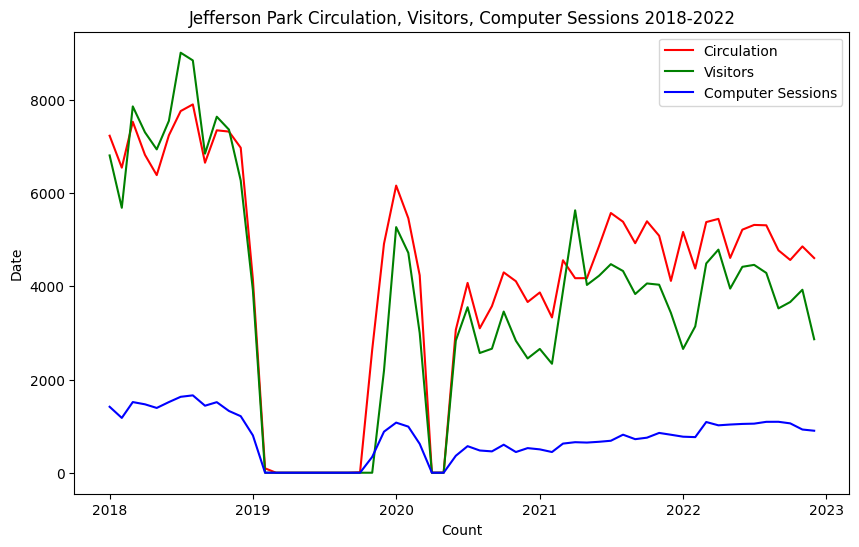

In [20]:
allBranchMetrics['DATE'] = pd.to_datetime(allBranchMetrics[['YEAR', 'MONTH']].assign(DAY=1))

def metricsForBranch(enterBranch, year1, year2, year3, year4, year5):
    selectedBranch = allBranchMetrics.loc[(allBranchMetrics['BRANCH']==enterBranch)&((allBranchMetrics['YEAR']==year1)|
                                                                              (allBranchMetrics['YEAR']==year2)|
                                                                              (allBranchMetrics['YEAR']==year3)|
                                                                              (allBranchMetrics['YEAR']==year4)|
                                                                              (allBranchMetrics['YEAR']==year5))]
    selectedBranchCirc = selectedBranch.groupby('DATE')['CIRCULATION'].mean()
    selectedBranchVisitors = selectedBranch.groupby('DATE')['VISITORS'].mean()
    selectedBranchComputerSessions = selectedBranch.groupby('DATE')['COMPUTER_SESSIONS'].mean()
    # Plot the monthly visitor patterns
    year1 = str(year1)
    year5 = str(year5)
    plt.figure(figsize=(10,6)) 
    plt.plot(selectedBranchCirc, color = 'red')
    plt.plot(selectedBranchVisitors, color = 'green')
    plt.plot(selectedBranchComputerSessions, color = 'blue')
    plt.legend(['Circulation', 'Visitors', 'Computer Sessions'])
    plt.title(enterBranch+' Circulation, Visitors, Computer Sessions '+year1+"-"+year5)
    plt.ylabel('Date')
    plt.xlabel('Count')
    plt.show()
    return

#metricsForBranch("Edgewater", 2011, 2012, 2013, 2014, 2015) #2011-2014  book mobile
#metricsForBranch("Water Works", 2011, 2012, 2013, 2014, 2015) #2011-2014 
#metricsForBranch("Galewood-Mont Clare", 2011, 2012, 2013, 2014, 2015) #2011-2014
#metricsForBranch("Independence", 2015, 2016, 2017, 2018, 2019") #fire so moved and reopened 2015-2019 # call lib and ask about their 2020 situation -- were you only closed for 2 months
metricsForBranch("Jefferson Park", 2018, 2019, 2020, 2021, 2022) #2018-2022